<a href="https://colab.research.google.com/github/pimentad2020/DSWP/blob/master/PYCARET_Clustering_EXEMPLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=2oxLDir7foQ


In [2]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.5MB/s 
     |████████████████████████████████| 14.2MB 300kB/s 
     |████████████████████████████████| 245kB 38.3MB/s 
     |████████████████████████████████| 65.8MB 58kB/s 
     |████████████████████████████████| 174kB 41.4MB/s 
     |████████████████████████████████| 157.5MB 68kB/s 
     |████████████████████████████████| 1.8MB 32.2MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 1.6MB 35.3MB/s 
     |████████████████████████████████| 6.8MB 27.3MB/s 
     |████████████████████████████████| 276kB 31.4MB/s 
     |████████████████████████████████| 1.1MB 32.3MB/s 
     |████████████████████████████████| 348kB 35.2MB/s 
     |████████████████████████████████| 153kB 35.5MB/s 
     |████████████████████████████████| 163kB 32.8MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
 

In [3]:
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
data.shape

(505, 4)

# Training clustering model

In [5]:
from pycaret.clustering import *

In [6]:
modelo_cluster = setup(data, normalize=True, session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


# Create Model

In [7]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2649,0.3743,0,0,0


In [13]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [14]:
kmodes = create_model('kmodes')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3487,19.8356,3.1046,0,0,0


In [15]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7f9d53ca5d08>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


# Analyze Model

In [8]:
plot_model(kmeans)

In [10]:
plot_model(kmeans, plot = 'tsne')

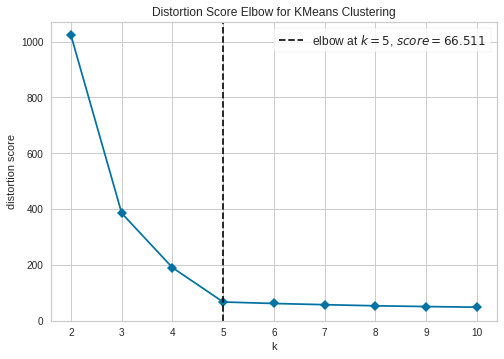

In [11]:
plot_model(kmeans, plot = 'elbow')

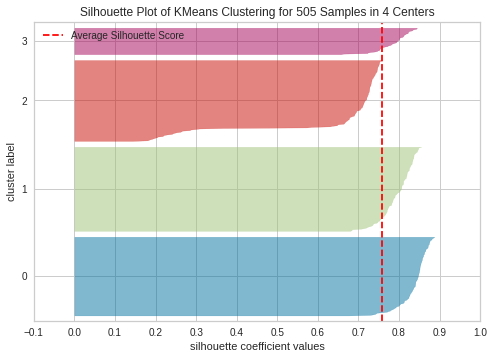

In [12]:
plot_model(kmeans, plot = 'silhouette')

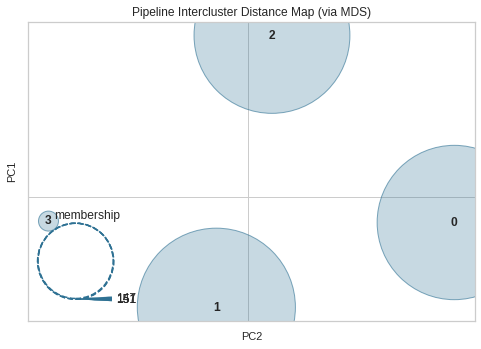

In [16]:
plot_model(kmeans, plot = 'distance')

In [17]:
plot_model(kmeans, plot = 'distribution')

In [18]:
plot_model(kmeans, plot = 'distribution',feature = 'Age')

In [19]:
plot_model(kmeans, plot = 'distribution',feature = 'Income')

# Assign Cluster Labels to dataset

In [20]:
kmeans_results= assign_model(kmeans)

In [21]:
kmeans_results.head(10)

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0
5,29,131578,0.847034,3535.514352,Cluster 3
6,54,76500,0.785198,6878.884249,Cluster 1
7,87,42592,0.355290,18086.287158,Cluster 0
8,83,34384,0.324719,14783.379086,Cluster 0
9,84,27693,0.367063,17879.558906,Cluster 0


# Predict Cluster Labels to Unseen data

In [23]:
labels = predict_model(kmeans, data = data)

In [24]:
labels.head(10)

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0
5,29,131578,0.847034,3535.514352,Cluster 3
6,54,76500,0.785198,6878.884249,Cluster 1
7,87,42592,0.355290,18086.287158,Cluster 0
8,83,34384,0.324719,14783.379086,Cluster 0
9,84,27693,0.367063,17879.558906,Cluster 0
